In [1]:
# importing libraries
%pip install mediapipe opencv-python matplotlib
import cv2
import numpy as np
import mediapipe as mp
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

### Capturing the expected pose 

In [2]:
timeout = time.time() + 30   # 30 seconds from now
cap = cv2.VideoCapture(0)
# setting up mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened() and time.time() < timeout:
        ret, frame = cap.read()
        # detect pose landmarks and render them on the image
        # convert the image from BGR to RGB (opneCV uses BGR by default)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        # make detection from pose instance
        results = pose.process(image)
        # print(results.pose_landmarks)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # print(results)
        # render pose landmarks on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(51,255,51), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(51,153,255), thickness=2, circle_radius=2))
        
        # cv2.imshow('MediaPipe Pose', frame)
        cv2.imshow('MediaPipe Pose', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() 

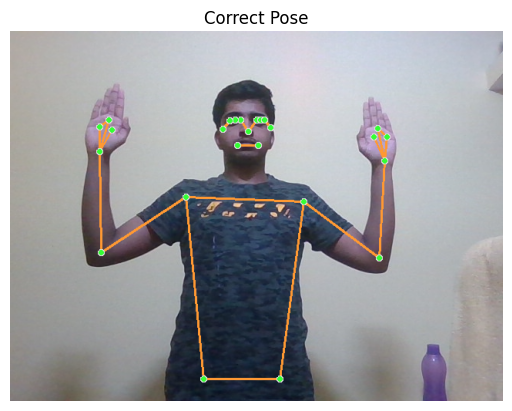

In [3]:
# correct pose
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Correct Pose')
plt.axis('off')
plt.savefig('correct_pose.png')

### Detecting the pose

In [10]:
timeout = time.time() + 30   # 30 seconds from now
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        # make detection from pose instance
        current_results = pose.process(image)
        # print(results.pose_landmarks)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #compare the results
        match_count = 0
        for (act, expected) in zip(current_results.pose_landmarks.landmark, results.pose_landmarks.landmark):
            # calculate the distance between the actual and expected landmarks
            dist = np.sqrt((act.x - expected.x)**2 + (act.y - expected.y)**2 + (act.z - expected.z)**2)
            if dist < 0.1:
                match_count += 1
        # calculate the percentage of matched landmarks
        match_percent = (match_count / len(results.pose_landmarks.landmark)) * 100
        text = f"{round(match_percent, 2)}% match - "  
        # render pose landmarks on the image
        if match_percent > 75:
            text += "Correct Pose"
            color = (0, 255, 0)
        else:
            text+= "Incorrect Pose"
            color = (0, 0, 255)
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(51,255,51), thickness=2, circle_radius=2),
                    mp_drawing.DrawingSpec(color=(51,153,255), thickness=2, circle_radius=2))    
            
        mp_drawing.draw_landmarks(image, current_results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(color=color, thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=color, thickness=2, circle_radius=2))
        cv2.putText(image,text, (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('MediaPipe Pose', image)
        # render the results from previous cell
        sentence = "No pose detected"
        if cv2.waitKey(10) & 0xFF == ord('q') or time.time() > timeout:
            break
    cap.release()
    cv2.destroyAllWindows()     

### Final Output

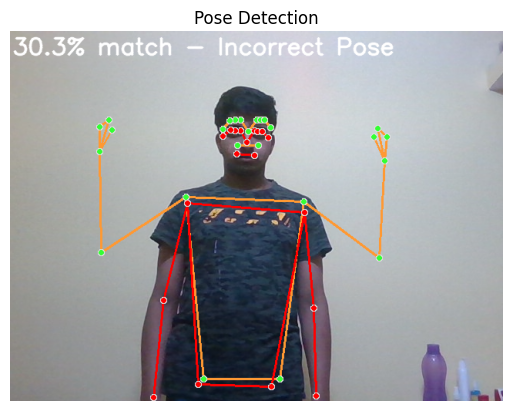

In [11]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Pose Detection')
plt.axis('off')
plt.savefig('pose_detection.png')

### Output when the pose is correct
<img src="./pose_detection-correctMatch.png" >